<a href="https://colab.research.google.com/github/maddym132/cbm_codes_open/blob/master/defect_manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from  torch.utils.data import DataLoader, TensorDataset
from os import listdir
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

(300, 300, 3)


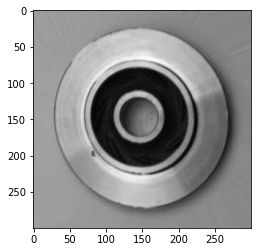

In [ ]:
def showImg(mypath):
    plt.figure()
    img = mpimg.imread(mypath)
    print(img.shape)
    plt.imshow(img)
#defect
pathdef = '/content/cast_def_0_0.jpeg'
showImg(pathdef)

(300, 300, 3)


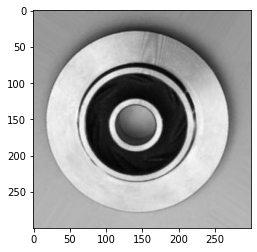

In [ ]:
#ok
pathok = '/content/cast_ok_0_1.jpeg'
showImg(pathok)

In [ ]:
def readimg(mydir):
    result = []
    image_names = listdir(mydir)
    for name in image_names:
        img = mpimg.imread(mydir+'/'+name)
        result.append(img)
    result = np.array(result)
    return result

train_def_path = '/content/train/def_front'
train_ok_path = '/content/train/ok_front'
test_def_path = '/content/test/def_front'
test_ok_path = '/content/test/ok_front'
train_def = readimg(train_def_path)
train_ok = readimg(train_ok_path)
test_def = readimg(test_def_path)
test_ok = readimg(test_ok_path)

In [ ]:
print(train_def.shape)
print(train_ok.shape)

(10, 300, 300, 3)
(10, 300, 300, 3)


In [ ]:
trainY = np.concatenate((np.zeros(train_def.shape[0]),np.ones(train_ok.shape[0])))
trainX = np.concatenate((train_def, train_ok))
testY = np.concatenate((np.zeros(test_def.shape[0]),np.ones(test_ok.shape[0])))
testX = np.concatenate((test_def, test_ok))

In [ ]:
trainX, validX, trainY, validY = train_test_split(trainX,trainY,shuffle = True, random_state = 42) #train: test = 0.75: 0.25

In [ ]:
#Creating model

image_shape = (300,300,3)

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(trainX, trainY, batch_size = 32, epochs = 10, validation_data = (validX, validY))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 3.1511 - accuracy: 0.4000 - val_loss: 351.9812 - val_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 490ms/step - loss: 270.2736 - accuracy: 0.5333 - val_loss: 67.9936 - val_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 1s 525ms/step - loss: 51.4571 - accuracy: 0.5333 - val_loss: 34.3376 - val_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 490ms/step - loss: 41.2318 - accuracy: 0.4667 - val_loss: 23.8765 - val_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 1s 506ms/step - loss: 28.7560 - accuracy: 0.4667 - val_loss: 11.9136 - val_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 489ms/step - loss: 12.2492 - accuracy: 0.4667 - val_loss: 1.5151 - val_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 1s 519ms/step - loss: 0.1787 - accuracy: 0.9333 - val_loss: 4.0325 - val_accuracy: 0.4000
Epoch 8/10


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 16)       0

In [ ]:
history = model.history.history
history

{'loss': [3.1511051654815674,
  270.2735595703125,
  51.457096099853516,
  41.23183059692383,
  28.755985260009766,
  12.249163627624512,
  0.17871592938899994,
  2.327361822128296,
  1.0950274467468262,
  0.08422984927892685],
 'accuracy': [0.4000000059604645,
  0.5333333611488342,
  0.5333333611488342,
  0.46666666865348816,
  0.46666666865348816,
  0.46666666865348816,
  0.9333333373069763,
  0.6000000238418579,
  0.6666666865348816,
  1.0],
 'val_loss': [351.9812316894531,
  67.99360656738281,
  34.337608337402344,
  23.876510620117188,
  11.913613319396973,
  1.5151021480560303,
  4.032474517822266,
  1.9561960697174072,
  1.1630500555038452,
  1.7553523778915405],
 'val_accuracy': [0.4000000059604645,
  0.4000000059604645,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.4000000059604645,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579]}